# Libraries

In [1]:
# Local Models
from library.data_entry import get_data

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%load_ext autoreload
%autoreload 2

# Parameters

In [2]:
start_date = '2018-01-01'
end_date = '2023-01-01'

ticker = 'NFLX' # Netflix

# Get Data

In [3]:
data = get_data(ticker, start_date, end_date, )
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,RSI,EMA_8,EMA_20,PctChange,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,
2018-02-20,277.739990,285.809998,276.609985,278.549988,278.549988,7769000,66.795064,269.975718,257.848747,-0.008860,14.920067,-1.080915,16.000982
2018-02-21,282.070007,286.640015,280.010010,281.040009,281.040009,9371100,67.834166,272.434450,260.057439,0.010426,14.965234,-0.828598,15.793832
2018-02-22,283.880005,284.500000,274.450012,278.140015,278.140015,8891500,65.284840,273.702353,261.779589,-0.027244,14.598738,-0.956075,15.554813
2018-02-23,281.000000,286.000000,277.809998,285.929993,285.929993,7301800,68.673241,276.419606,264.079627,-0.027978,14.766654,-0.630528,15.397181
2018-02-26,288.750000,295.649994,287.010010,294.160004,294.160004,10268600,71.790019,280.361917,266.944425,0.012216,15.386455,-0.008581,15.395036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,298.089996,298.880005,290.809998,297.750000,297.750000,7856200,51.131161,298.057026,298.903042,0.009459,2.537956,-3.212191,5.750147
2022-12-23,296.179993,298.459991,291.910004,294.959991,294.959991,4251100,49.608470,297.368796,298.527513,0.037970,1.990539,-3.007686,4.998226
2022-12-27,293.190002,293.570007,282.130005,284.170013,284.170013,5778100,44.159343,294.435733,297.160132,0.026329,0.678229,-3.455998,4.134226


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1225 entries, 2018-02-20 to 2022-12-29
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1225 non-null   float64
 1   High           1225 non-null   float64
 2   Low            1225 non-null   float64
 3   Close          1225 non-null   float64
 4   Adj Close      1225 non-null   float64
 5   Volume         1225 non-null   int64  
 6   RSI            1225 non-null   float64
 7   EMA_8          1225 non-null   float64
 8   EMA_20         1225 non-null   float64
 9   PctChange      1225 non-null   float64
 10  MACD_12_26_9   1225 non-null   float64
 11  MACDh_12_26_9  1225 non-null   float64
 12  MACDs_12_26_9  1225 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 134.0 KB


- Values Are Not Null
- Volume is Int and Rest are float64

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA_8,EMA_20,PctChange,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1.225000e+03,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,391.749763,397.932024,385.215127,391.703461,391.703461,8.130527e+06,51.552675,391.637350,391.399711,0.000446,0.326767,-0.045674,0.372440
std,118.778702,119.462361,117.727118,118.519283,118.519283,6.900326e+06,11.897349,117.590876,116.298183,0.032500,12.665595,3.499848,12.079723
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06,9.894673,177.662100,181.549972,-0.144234,-59.233806,-18.311659,-48.342280
25%,306.000000,311.500000,300.730011,305.559998,305.559998,4.382900e+06,43.346394,305.575326,302.696126,-0.015178,-6.075968,-1.932007,-5.529099
50%,364.920013,369.829987,358.510010,363.910004,363.910004,6.340100e+06,52.100408,362.263662,361.569348,-0.000144,2.525406,0.114740,2.474692
75%,496.459991,504.250000,490.230011,497.000000,497.000000,9.827800e+06,60.305302,497.373012,498.763812,0.014178,8.832670,1.916570,8.296266
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08,84.626185,677.775338,667.641123,0.541226,24.170482,9.408465,20.408566


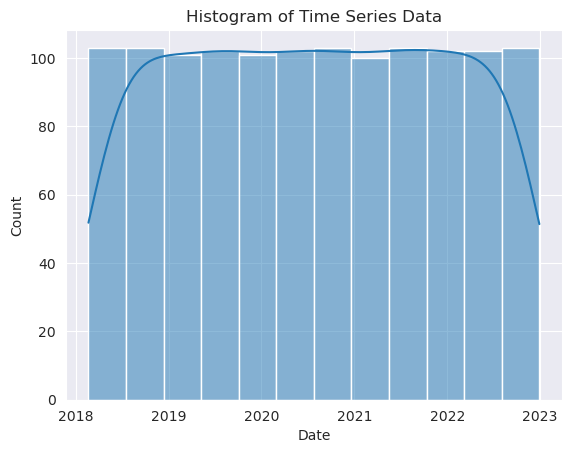

In [6]:
# Visualize the data
sns.histplot(data.index, kde=True)
plt.title('Histogram of Time Series Data')
plt.show()

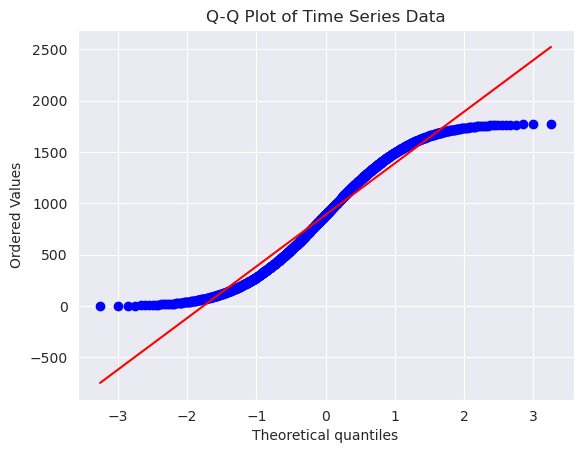

In [7]:
# Convert the index to numeric representation (days since the start of the time series)
index_numeric = (data.index - data.index[0]).days

# Q-Q plot
stats.probplot(index_numeric, dist='norm', plot=plt)
plt.title('Q-Q Plot of Time Series Data')
plt.show()


our dataset has a <font size="5">**uniform distribution**</font>, both the right and left tails are small and the extreme values in the above plot are falling close to the center.

In [8]:
# Shapiro-Wilk test
statistic, p_value = stats.shapiro(index_numeric)
print(f"Shapiro-Wilk test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Kolmogorov-Smirnov test
statistic, p_value = stats.kstest(index_numeric, 'norm')
print(f"Kolmogorov-Smirnov test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")


Shapiro-Wilk test statistic: 0.9547
p-value: 0.0000
Kolmogorov-Smirnov test statistic: 0.9967
p-value: 0.0000


- The test statistic of 0.9547 indicates how well the data aligns with a normal distribution. A value close to 1 suggests a closer fit to normality. However, in this case, the p-value of 0.0000 (usually denoted as "<0.001") indicates strong evidence against the null hypothesis that the data follows a normal distribution. The low p-value suggests that the data significantly deviates from normality.

- The test statistic of 0.9968 represents the maximum distance between the empirical cumulative distribution function (CDF) of the data and the theoretical CDF (in this case, the normal distribution CDF). The p-value of 0.0000 (usually denoted as "<0.001") suggests strong evidence against the null hypothesis that the data follows a normal distribution.

In summary, based on the results of both tests, the provided data shows strong evidence to reject the assumption of normality.



In [9]:
# Convert index to numeric representation
index_numeric = data.index.to_series().diff().dt.total_seconds().cumsum()

# Skewness and kurtosis
skewness = index_numeric.skew()
kurtosis = index_numeric.kurtosis()
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")


Skewness: -0.0021
Kurtosis: -1.2000


Skewness measures the asymmetry of a distribution. A skewness value of -0.0020 indicates a slight left skew, which means the distribution has a slightly longer left tail compared to the right tail. However, a value close to zero suggests that the distribution is relatively symmetric.

Kurtosis measures the heaviness of the tails and the presence of outliers in a distribution. A kurtosis value of -1.2001 suggests a platykurtic distribution, which means it has thinner tails and a flatter peak compared to a normal distribution. Negative kurtosis values indicate a relatively flatter distribution compared to a normal distribution.

In summary, based on the provided skewness and kurtosis values, the distribution appears to be slightly left-skewed and platykurtic. However, both skewness and kurtosis values are relatively close to zero, indicating that the distribution is approximately symmetric and has tails that are not overly heavy.

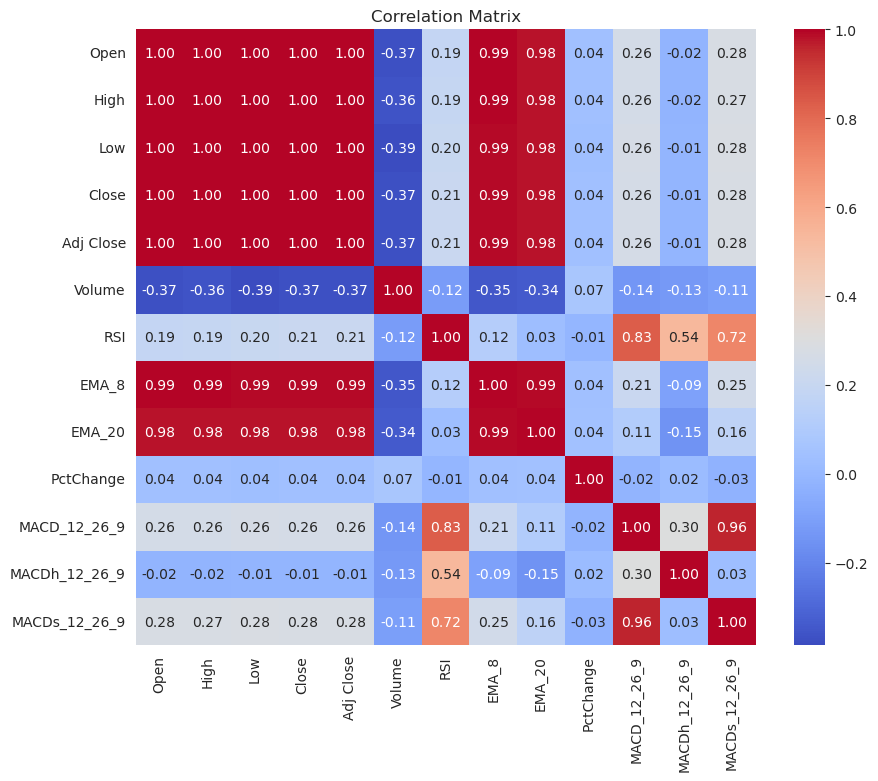

In [10]:

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

1. Open, High, Low, Close, and Adj Close: These variables show a strong positive correlation with each other, with correlation coefficients ranging from approximately 0.997 to 0.999. This indicates a high degree of linear association between these variables.

2. Volume: Volume has a negative correlation with Open, High, Low, Close, and Adj Close. The correlation coefficients range from approximately -0.374 to -0.388. This suggests that as the stock prices increase, the trading volume tends to decrease, and vice versa.

3. SI: RSI (Relative Strength Index) has a positive correlation with Open, High, Low, Close, and Adj Close, but the correlation coefficient is relatively small (around 0.17). This indicates a weaker linear association between RSI and the price-related variables.

4. EMA_8 and EMA_20: EMA_8 and EMA_20 (Exponential Moving Averages) exhibit strong positive correlations with Open, High, Low, Close, and Adj Close, with correlation coefficients above 0.98. This suggests a high degree of linear association between the moving averages and the price-related variables.

5. PctChange: PctChange (Percentage Change) has a small positive correlation with Open, High, Low, Close, and Adj Close, with correlation coefficients ranging from approximately 0.036 to 0.041. This indicates a relatively weak linear association between the percentage change and the price-related variables.

6. index_numeric: index_numeric has a moderate positive correlation with Open, High, Low, Close, Adj Close, and EMA_8, with correlation coefficients ranging from approximately 0.173 to 0.205. This suggests a moderate linear association between index_numeric and these variables.